# Predicting Car Prices

# Introduction to the Data Set

In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 99

In [2]:
cols = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price']
cars = pd.read_csv('imports-85.data',names=cols)

In [3]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [4]:
cars.dtypes # Get data types of each column

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
numeric_col = ['normalized-losses','wheel-base','length','width','height','curb-weight','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price'] # looking at the dataset preview determines this using continuous values
numeric_cars = cars[numeric_col]
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning

In [6]:
numeric_cars = numeric_cars.replace('?',np.nan)
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,NaN


In [7]:
numeric_cars.dtypes # get data types of all columns

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
# Convert to float as we have decimal values
numeric_cars = numeric_cars.astype('float')
# Get the missing values for all columns
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
# Price is the target column
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [10]:
# Using column means to fill in missing values
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
# Verify that all columns are filled
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
# Keeping the price column
price_c = numeric_cars['price']
# Normalize
numeric_cars = (numeric_cars - numeric_cars.mean()) / (numeric_cars.max() - numeric_cars.min())
# Readd the price column
numeric_cars['price'] = price_c

In [12]:
# Look at the dataframe after cleaning
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,13495.0
1,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,16500.0
2,0.000000,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,-0.464793,0.101474,-0.072767,0.236463,-0.047995,-0.171642,-0.123331,16500.0
3,0.219895,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.100508,0.068141,-0.010267,-0.006528,0.156087,-0.032753,-0.018068,13950.0
4,0.219895,0.017580,0.035806,0.043671,0.044444,0.104086,-0.100508,0.068141,-0.135267,0.054220,0.156087,-0.199420,-0.228594,17450.0


# Univariate Model

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    # Initialize random seed and KNeighborsRegressor class
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize the rows
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    # Create number to split the dataframe into training and testing sets
    train_row_split = int(len(random_df) / 2)
    
    # First half of dataset is the training set
    # Last half of dataset is the testing set
    train_df = random_df.iloc[0:train_row_split]
    test_df = random_df.iloc[train_row_split:]
    
    # Fit a model using the default k value of 5 data frames are required here so we need df[['name']]
    knn.fit(train_df[[train_col]],train_df[[target_col]])
    
    # Make the prediction
    prediction = knn.predict(test_df[[train_col]])
    
    # Calculate the rmse
    mse = mean_squared_error(test_df[target_col],prediction)
    rmse = np.sqrt(mse)
    return rmse

# price is the target column so we will remove it from the training set
rmse = {}
train_col = numeric_cars.columns.drop('price')
target_col = 'price'
for column in train_col:
    rmse_value = knn_train_test(column,target_col,numeric_cars)
    rmse[column] = rmse_value

# Generate a series from the dictionary
rmse_series = pd.Series(rmse)
rmse_series.sort_values()

horsepower           4010.414152
curb-weight          4401.118255
highway-mpg          4652.697833
width                4908.609914
city-mpg             4973.940485
length               5429.900973
wheel-base           5460.787788
compression-rate     6610.812153
bore                 6806.695830
normalized-losses    7304.373172
peak-rpm             7678.470979
height               7842.199226
stroke               8005.611387
dtype: float64

In [23]:
def knn_train_test(train_col, target_col, df):
    # Initialize random seed and KNeighborsRegressor class
    np.random.seed(1)
    
    # Randomize the rows
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    # Create number to split the dataframe into training and testing sets
    train_row_split = int(len(random_df) / 2)
    
    # First half of dataset is the training set
    # Last half of dataset is the testing set
    train_df = random_df.iloc[0:train_row_split]
    test_df = random_df.iloc[train_row_split:]
    
    k_values = [1,3,5,7,9]
    k_rmse = {}
    
    for k in k_values:
        # fit model using K Nearest Neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]],train_df[[target_col]])
        
        # make prediction
        prediction = knn.predict(test_df[[train_col]])
        
        # Calculate Mean Squared Error and return rmse
        mse = mean_squared_error(test_df[target_col],prediction)
        rmse = np.sqrt(mse)
        
        k_rmse[k] = rmse
    return k_rmse

# price is the target column so we will remove it from the training set
k_rmse_results = {}
train_col = numeric_cars.columns.drop('price')
target_col = 'price'
for column in train_col:
    k_rmse = knn_train_test(column,target_col,numeric_cars)
    k_rmse_results[column] = k_rmse 

k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6806.695830075582,
  7: 6939.105845651802,
  9: 6915.297375013411},
 'city-mpg': {1: 5863.190943471308,
  3: 4672.77285307275,
  5: 4973.94048466108,
  7: 5413.390882677539,
  9: 5277.1766643494775},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5288.0195725810245,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.6701276238755,
  9: 4633.425879994758},
 'height': {1: 8942.012951995952,
  3: 8378.23385277286,
  5: 7842.199225717336,
  7: 7709.0699416548505,
  9: 7777.1734491607085},
 'highway-mpg': {1: 6022.866724754784,
  3: 4671.390389789466,
  5: 4652.697832525993,
  7: 4817.230104360727,
  9: 5261.877043557105},
 'horsepower': {1: 4170.054848037801,
  3: 3985.1389178696736,
  5: 4010.4141521891734,
  7: 4351.268271181572,
  9: 4514.504641478055},
 'length': {1: 4611.990241761035,
  3: 5129.672039752984

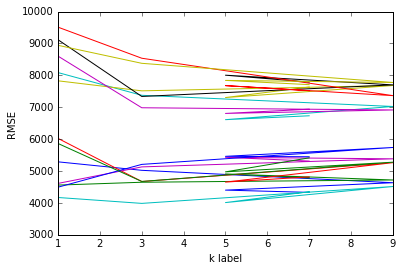

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# Get the values from the dictionary
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k label')
    plt.ylabel('RMSE')



# Multivariate Model

In [25]:
# Average RMSE for different k values for each feature
avg_rmse_feature = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    avg_rmse_feature[k] = avg_rmse
series_avg_rmse = pd.Series(avg_rmse_feature)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

horsepower           4206.276166
width                4723.406333
curb-weight          4735.110369
highway-mpg          5085.212419
length               5173.300277
city-mpg             5240.094366
wheel-base           5269.942030
compression-rate     7166.073599
bore                 7249.585405
normalized-losses    7592.985593
stroke               7990.349767
peak-rpm             8122.477154
height               8129.737884
dtype: float64


In [28]:
def knn_train_test(train_col, target_col, df):
    # Initialize random seed and KNeighborsRegressor class
    np.random.seed(1)
    
    # Randomize the rows
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    # Create number to split the dataframe into training and testing sets
    train_row_split = int(len(random_df) / 2)
    
    # First half of dataset is the training set
    # Last half of dataset is the testing set
    train_df = random_df.iloc[0:train_row_split]
    test_df = random_df.iloc[train_row_split:]
    
    k_values = [5]
    k_rmse = {}
    
    for k in k_values:
        # fit model using K Nearest Neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col],train_df[target_col]) # Series here instead of dataframe
        
        # make prediction
        prediction = knn.predict(test_df[train_col]) # Series here instead of dataframe for single k value
        
        # Calculate Mean Squared Error and return rmse
        mse = mean_squared_error(test_df[target_col],prediction)
        rmse = np.sqrt(mse)
        
        k_rmse[k] = rmse
    return k_rmse
target_col = 'price'
k_rmse_results_multi = {}
for nr_best_features in range(2,7):
    k_rmse_results_multi['{} best features'.format(nr_best_features)] = knn_train_test(sorted_features[:nr_best_features],target_col,numeric_cars)

k_rmse_results_multi

{'2 best features': {5: 3589.5762113967917},
 '3 best features': {5: 3305.9401397969677},
 '4 best features': {5: 3358.6915801682458},
 '5 best features': {5: 3665.546673045813},
 '6 best features': {5: 3628.261188214127}}

#  Hyperparameter Tuning

In [29]:
def knn_train_test(train_col, target_col, df):
    # Initialize random seed and KNeighborsRegressor class
    np.random.seed(1)
    
    # Randomize the rows
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    # Create number to split the dataframe into training and testing sets
    train_row_split = int(len(random_df) / 2)
    
    # First half of dataset is the training set
    # Last half of dataset is the testing set
    train_df = random_df.iloc[0:train_row_split]
    test_df = random_df.iloc[train_row_split:]
    
    k_values = [x for x in range(1,25)]
    k_rmse = {}
    
    for k in k_values:
        # fit model using K Nearest Neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col],train_df[target_col]) # Series here instead of dataframe
        
        # make prediction
        prediction = knn.predict(test_df[train_col]) # Series here instead of dataframe for single k value
        
        # Calculate Mean Squared Error and return rmse
        mse = mean_squared_error(test_df[target_col],prediction)
        rmse = np.sqrt(mse)
        
        k_rmse[k] = rmse
    return k_rmse
target_col = 'price'
k_rmse_results_multi_hyp = {} # this is for hyperparameter and also prevents overwriting
for nr_best_features in range(2,7):
    k_rmse_results_multi_hyp['{} best features'.format(nr_best_features)] = knn_train_test(sorted_features[:nr_best_features],target_col,numeric_cars)

k_rmse_results_multi_hyp

{'2 best features': {1: 4049.8406434850945,
  2: 3497.1505051885592,
  3: 3397.4443755459038,
  4: 3587.0044198356923,
  5: 3589.5762113967917,
  6: 3680.062981095498,
  7: 3757.258897805206,
  8: 3938.0982689448388,
  9: 4078.35009672158,
  10: 4163.774407343358,
  11: 4297.109020298368,
  12: 4371.8292017537615,
  13: 4500.101636473384,
  14: 4604.096855916295,
  15: 4595.162191544566,
  16: 4605.261036835626,
  17: 4609.54548896688,
  18: 4599.186905244416,
  19: 4577.3440620943475,
  20: 4654.011174851599,
  21: 4759.1165072938775,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787},
 '3 best features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.77110337

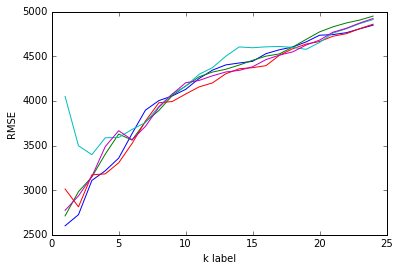

In [30]:
for k,v in k_rmse_results_multi_hyp.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('k label')
    plt.ylabel('RMSE')